# Drawing bounding boxes on images with text

In [126]:
import cv2
from matplotlib import pyplot as plt

In [127]:
image = cv2.imread('./00a87e911c965a90.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

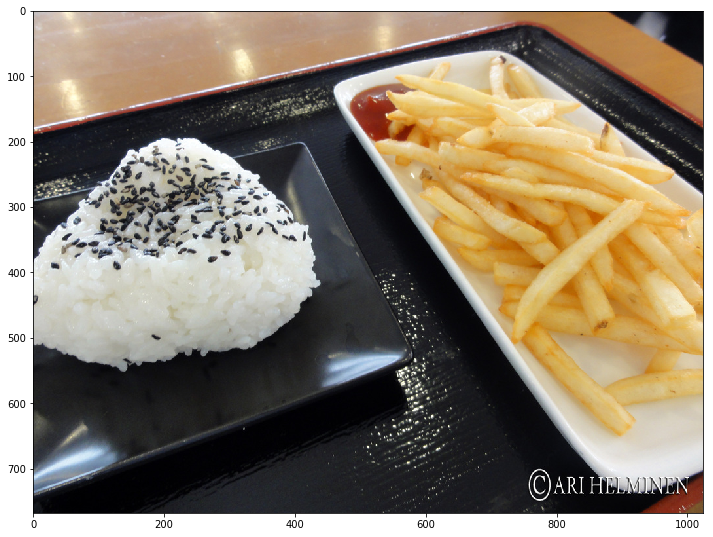

In [128]:
plt.figure(figsize=(12,12))
plt.imshow(rgb_image)

In [184]:
def draw_rects(img, rects, text, y_offset, thickness=3, border_colour=(33, 33, 183), text_bg_colour=(0,0,0)):
    
    copy = img.copy()
    
    for x, y, w, h in rects:
        
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_DUPLEX, 0.55, 1)
        text_length = text_size[0][0]
        text_height = text_size[0][1]
        
        cv2.rectangle(copy, 
                      (x - thickness + 1, y - y_offset), 
                      (x + text_length + thickness - 1, y), 
                      text_bg_colour, 
                      -1)
        
        cv2.rectangle(copy, 
                      (x, y), 
                      (x+w, y+h), 
                      border_colour, 
                      thickness)
        
        cv2.putText(copy, 
                    text,
                    (x, y - 6),
                    cv2.FONT_HERSHEY_DUPLEX,
                    .55,
                    (255, 255, 255),
                    lineType=cv2.LINE_AA)
    
    return copy

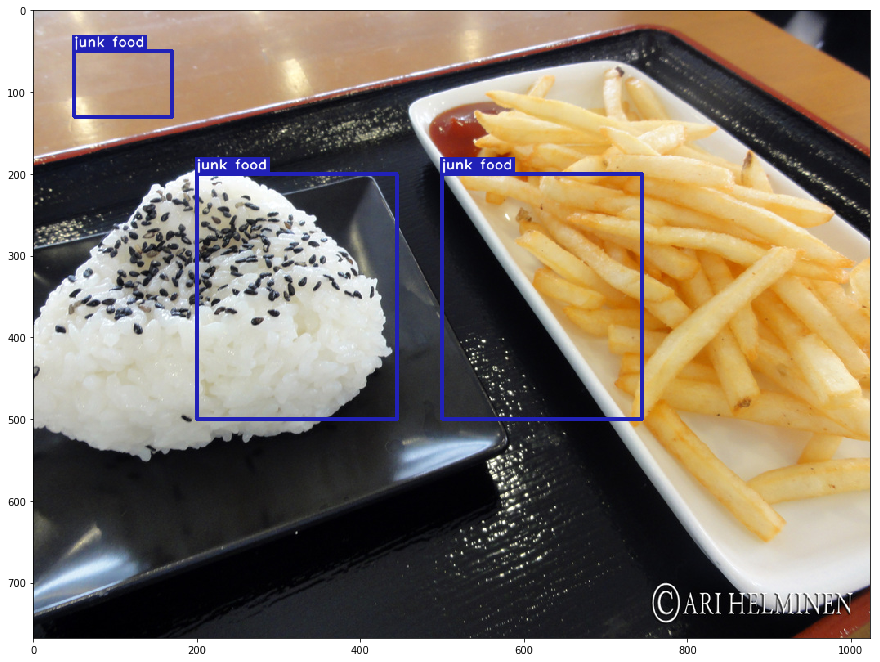

In [186]:
image_draw = draw_rects(rgb_image, 
                        [(200,200, 245, 300),
                        (50,50, 120, 80),
                        (500,200, 245, 300)], 
                        'junk food', 
                        y_offset=20, 
                        border_colour=(33, 33, 183),
                        text_bg_colour=(33, 33, 183))

plt.figure(figsize=(15,13))
plt.imshow(image_draw)